In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/Anshul/Downloads/Datasets/Delhi_v2.csv')

In [3]:
len(df)

7738

In [4]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [5]:
string_columns=list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [6]:
df.head()

,unnamed:_0,price,address,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,landmarks,type_of_building,desc,price_sqft
0,0,5600000.0,"noida_extension,_noida,_delhi_ncr",1350.0,28.608850,77.460560,3.0,3.0,NaN,under_construction,new_property,NaN,NaN,2.0,NaN,flat,\n\n\n________________________________welcome_...,4148.148148
1,1,8800000.0,"sector_79,_gurgaon,_delhi_ncr",1490.0,28.374236,76.952416,3.0,3.0,NaN,ready_to_move,new_property,NaN,semi-furnished,2.0,NaN,flat,\n\n\n________________________________mapsko_m...,5906.040268
2,2,16500000.0,"vaishali,_ghaziabad,_delhi_ncr",2385.0,28.645769,77.385110,4.0,5.0,NaN,ready_to_move,new_property,1.0,unfurnished,NaN,NaN,flat,\n\n\n________________________________this_pro...,6918.238994
3,3,3810000.0,"link_road,_f_block,_sector_50,_noida,_uttar_pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,new_property,1.0,unfurnished,2.0,near_gaur_mulberry_mansion,flat,\n\n\n________________________________aig_roya...,3628.571429
4,4,6200000.0,"jaypee_pavilion_court_sector_128,_noida,_secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,ready_to_move,resale,1.0,NaN,3.0,NaN,flat,\n\n\n________________________________the_prop...,4592.592593


<AxesSubplot:xlabel='price_sqft', ylabel='Count'>

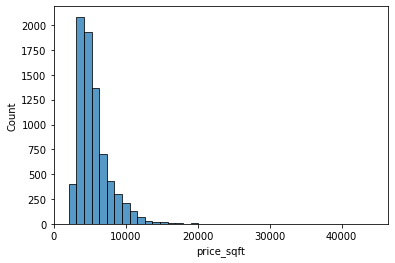

In [7]:
sns.histplot(df.price_sqft,bins=40)

<AxesSubplot:xlabel='price_sqft', ylabel='Count'>

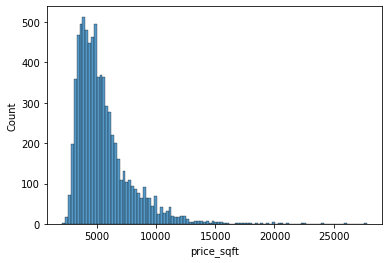

In [8]:
sns.histplot(df.price_sqft[df.price_sqft<30000])

In [9]:
log_price=np.log1p(df.price_sqft)

<AxesSubplot:xlabel='price_sqft', ylabel='Count'>

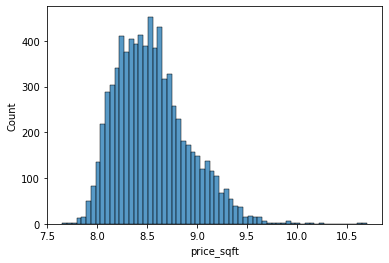

In [10]:
sns.histplot(log_price)

In [11]:
n=len(df)
n_val=int(0.2*n)
n_test=int(0.2*n)
n_train=n-(n_val+n_test)

np.random.seed(2)
idx=np.arange(n)
np.random.shuffle(idx)

df_shuffled=df.iloc[idx]
df_train=df_shuffled.iloc[:n_train].copy()
df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffled.iloc[n_train+n_val:].copy()

In [12]:
y_train=np.log1p(df_train.price_sqft.values)
y_val=np.log1p(df_val.price_sqft.values)
y_test=np.log1p(df_test.price_sqft.values)

In [13]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w=XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]

In [14]:
df=df.fillna(0)

In [15]:
df.isnull().sum()

unnamed:_0          0
price               0
address             0
area                0
latitude            0
longitude           0
bedrooms            0
bathrooms           0
balcony             0
status              0
neworold            0
parking             0
furnished_status    0
lift                0
landmarks           0
type_of_building    0
desc                0
price_sqft          0
dtype: int64

In [16]:
def rmse(y,y_pred):
    error=y_pred-y
    mse=(error**2).mean()
    return np.sqrt(mse)

In [17]:
base=['price','area','latitude','longitude','bedrooms','balcony']
def prepare_X(df):
    df=df.copy()
    features=base.copy()
    

    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [20]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression(X_train,y_train)
X_val=prepare_X(df_val)
y_pred=w_0 + X_val.dot(w)
print('validation error:',rmse(y_val,y_pred))

X_test=prepare_X(df_test)
y_pred=w_0 + X_test.dot(w)
print('test error: ',rmse(y_test,y_pred))

validation error: 0.1753905334076539
test error:  0.1736533360775058
